## Mapa de Ollas Comunes

In [28]:
import urbanpy as up
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt


import geoplot as gplt
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D

In [3]:
# Read ollas_comunes from downloads
df_ollas_comunes = pd.read_csv("inputs/ollas_comunes_2023-08-08.csv", sep=";")
df_ollas_comunes.head()

,Nombre de la Olla Comun,Ubicacion GPS,_Ubicacion GPS_latitude,_Ubicacion GPS_longitude,_Ubicacion GPS_altitude,_Ubicacion GPS_precision,_uuid
0,Olla Común Niño Jesús,NaN,NaN,NaN,NaN,NaN,c30bf0ee-c247-44f0-b960-b683f83eb646
1,Olla común Sector F Santa Rosa,NaN,NaN,NaN,NaN,NaN,900b1356-0a16-4957-bb70-05ee0c49a3d3
2,Sol Radiante,-12.093042 -76.88904 0 15.44080638885498,-12.093042,-76.889040,0.0,15.440806,ecadad4e-abc0-46e6-9707-1d4ebae460c7
3,Los Linderos,-12.094971 -76.886939 0 45.350807189941406,-12.094971,-76.886939,0.0,45.350807,aff61607-84bf-479e-99aa-07291aa9ddfd
4,Olla Bella Esmeralda,-12.107129 -76.879143 0 1,-12.107129,-76.879143,0.0,1.000000,ceb758b8-7bb9-401a-8ec4-97520b7f4b8c


In [4]:
df_ollas_comunes.loc[1, "_Ubicacion GPS_latitude"] = -12.097126442361986
df_ollas_comunes.loc[1, "_Ubicacion GPS_longitude"] = -76.88741737057579

In [5]:
df_ollas_comunes = df_ollas_comunes.drop(index=0)

In [6]:
df_ollas_comunes[["_Ubicacion GPS_latitude", "_Ubicacion GPS_longitude"]].isna().sum()

_Ubicacion GPS_latitude     1
_Ubicacion GPS_longitude    1
dtype: int64

In [7]:
gdf_ollas_comunes = gpd.GeoDataFrame(
    df_ollas_comunes[["_Ubicacion GPS_latitude", "_Ubicacion GPS_longitude"]],
    geometry=gpd.points_from_xy(
        df_ollas_comunes["_Ubicacion GPS_longitude"],
        df_ollas_comunes["_Ubicacion GPS_latitude"],
    ),
    crs=4326,
)

In [8]:
gdf_ollas_comunes.shape

(39, 3)

<Axes: >

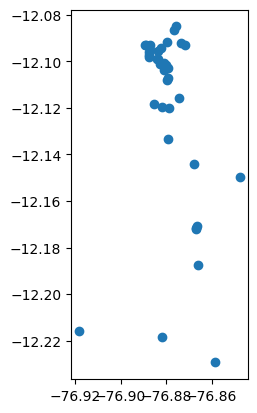

In [9]:
gdf_ollas_comunes.plot()

In [10]:
lima_distritos = gpd.read_file(
    "https://storage.googleapis.com/up_public_geodata/admin_bounds/peru/districts.zip"
)

In [11]:
lima_distritos.head()

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


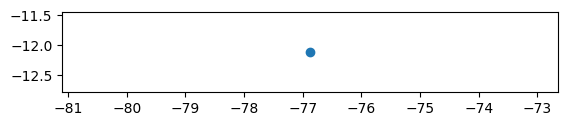

In [15]:
manchay = up.download.nominatim_osm("Manchay, Lima, Peru")  # Point
manchay.crs = "EPSG:4326"
ax = manchay.plot()

In [44]:
from shapely.geometry import Point

In [48]:
MARGIN = 0.1
distance_meters = Point(-74.3764, -9.1429).distance(Point(-75.3764, -9.1429))

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_78288/4192789675.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  minx, miny, maxx, maxy = manchay.buffer(0.15).envelope.total_bounds
/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_78288/4192789675.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


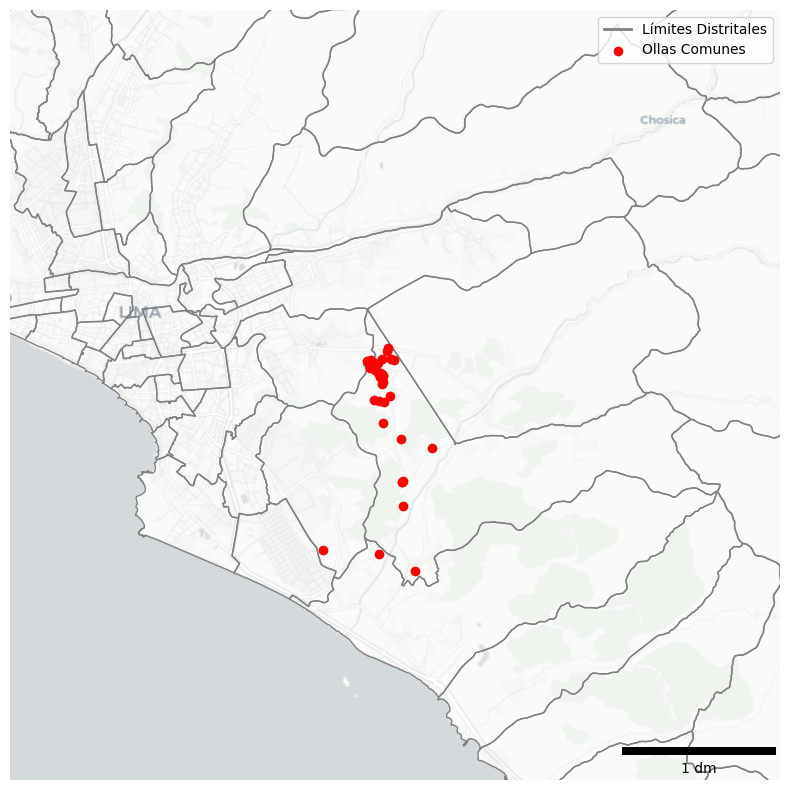

In [51]:
ax = lima_distritos.plot(
    facecolor="none",
    edgecolor="gray",
    label="Límites Distritales",
    figsize=(10, 10),
)

# Ollas comunes
gdf_ollas_comunes.plot(
    color="r",
    label="Ollas Comunes",
    ax=ax,
)

minx, miny, maxx, maxy = manchay.buffer(0.15).envelope.total_bounds
margins = MARGIN
ax.set_xlim(minx - margins, maxx + margins)
ax.set_ylim(miny - margins, maxy + margins)

ax.set_axis_off()
cx.add_basemap(
    ax=ax, source=cx.providers.CartoDB.Positron, crs="EPSG:4326", attribution=""
)

# Add label of the urbanization to the legend
handles, labels = ax.get_legend_handles_labels()
handles.insert(0, Line2D([0], [0], color="gray", lw=2, label="Límites Distritales"))
labels.insert(0, "Límites Distritales")
plt.legend(handles=handles, labels=labels, loc="upper right")

ax.add_artist(ScaleBar(distance_meters, location="lower right", box_alpha=0))

plt.savefig(
    "outputs/producto_3/maps/ollas_comunes.png",
    dpi=300,
    bbox_inches="tight",
)

In [64]:
gdf_ollas_comunes[
    ~gdf_ollas_comunes.within(
        lima_distritos[lima_distritos["DISTRITO"] == "PACHACAMAC"].geometry.iloc[0]
    )
]

,_Ubicacion GPS_latitude,_Ubicacion GPS_longitude,geometry
33,NaN,NaN,POINT EMPTY
36,-12.216040,-76.918200,POINT (-76.91820 -12.21604)
37,-12.218531,-76.881887,POINT (-76.88189 -12.21853)


In [65]:
df_ollas_comunes.loc[
    gdf_ollas_comunes[
        ~gdf_ollas_comunes.within(
            lima_distritos[lima_distritos["DISTRITO"] == "PACHACAMAC"].geometry.iloc[0]
        )
    ].index
].to_clipboard()

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_1971/4129129368.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  minx, miny, maxx, maxy = manchay.buffer(0.05).envelope.total_bounds
/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_1971/4129129368.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


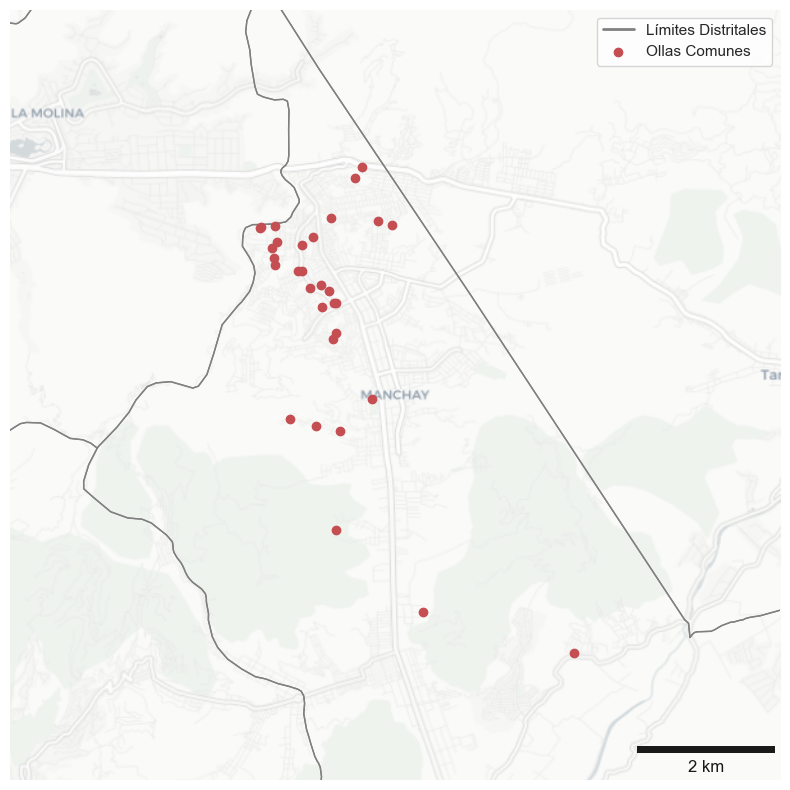

In [ ]:
ax = lima_distritos.plot(
    facecolor="none",
    edgecolor="gray",
    label="Límites Distritales",
    figsize=(10, 10),
)

# Ollas comunes
gdf_ollas_comunes.plot(
    color="r",
    label="Ollas Comunes",
    ax=ax,
)

minx, miny, maxx, maxy = manchay.buffer(0.05).envelope.total_bounds
margins = MARGIN
ax.set_xlim(minx - margins, maxx + margins)
ax.set_ylim(miny - margins, maxy + margins)

ax.set_axis_off()
cx.add_basemap(
    ax=ax, source=cx.providers.CartoDB.Positron, crs="EPSG:4326", attribution=""
)

# Add label of the urbanization to the legend
handles, labels = ax.get_legend_handles_labels()
handles.insert(0, Line2D([0], [0], color="gray", lw=2, label="Límites Distritales"))
labels.insert(0, "Límites Distritales")
plt.legend(handles=handles, labels=labels, loc="upper right")

ax.add_artist(ScaleBar(distance_meters, location="lower right", box_alpha=0))

plt.savefig(
    "outputs/producto_3/maps/ollas_comunes_zoomed.png",
    dpi=300,
    bbox_inches="tight",
)

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_78288/2476391215.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_ollas_comunes[gdf_ollas_comunes.within(manchay.buffer(0.05).envelope[0])],
/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_78288/2476391215.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  minx, miny, maxx, maxy = manchay.buffer(0.05).envelope.total_bounds
/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_78288/2476391215.py:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_lab

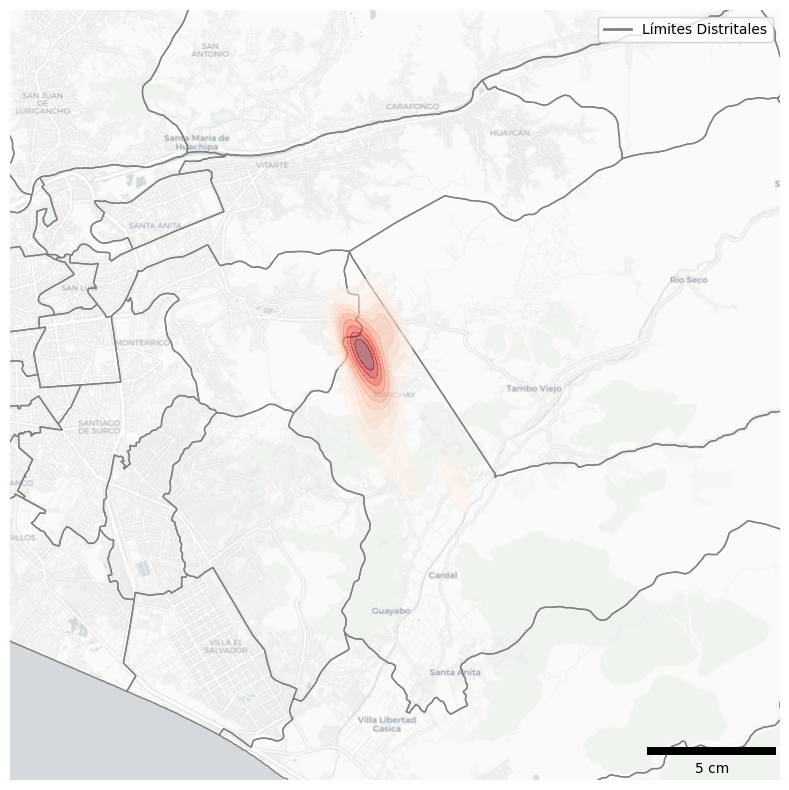

In [50]:
ax = lima_distritos.plot(
    facecolor="none",
    edgecolor="gray",
    label="Límites Distritales",
    figsize=(10, 10),
)

# Ollas comunes
gplt.kdeplot(
    gdf_ollas_comunes[gdf_ollas_comunes.within(manchay.buffer(0.05).envelope[0])],
    cmap="Reds",
    ax=ax,
    fill="True",
    alpha=0.5,
    thresh=0.05,  # cbar=True, cbar_ax=cax,
)

minx, miny, maxx, maxy = manchay.buffer(0.05).envelope.total_bounds
margins = MARGIN
ax.set_xlim(minx - margins, maxx + margins)
ax.set_ylim(miny - margins, maxy + margins)

ax.set_axis_off()
cx.add_basemap(
    ax=ax, source=cx.providers.CartoDB.Positron, crs="EPSG:4326", attribution=""
)

# Add label of the urbanization to the legend
handles, labels = ax.get_legend_handles_labels()
handles.insert(0, Line2D([0], [0], color="gray", lw=2, label="Límites Distritales"))
labels.insert(0, "Límites Distritales")
plt.legend(handles=handles, labels=labels, loc="upper right")

ax.add_artist(ScaleBar(distance_meters, location="lower right", box_alpha=0))

plt.savefig(
    "outputs/producto_3/maps/ollas_comunes_zoomed_heatmap.png",
    dpi=300,
    bbox_inches="tight",
)